# Assignment 1  

For the exercises below you can use the numpy and scipy libraries.

## Problem 1: Simulation (20 points)

Review amy of the probability theory links [provided in your course site](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/probability/index.html). The exercise refers to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf).

### Problem 1A (15 points)

Simulate (sample from) the bivariate normal distribution with the shown parameters obtaining a plot similar to Figure 6.8b that shows the simulation result from a different bivariate Gaussian distribution.  You can generate $m=200$ samples/points (10 points)

### Problem 1B (5 points)

Plot the contours of the bivariate Gaussian distribution and the simulated points in the same plot. (5 points)

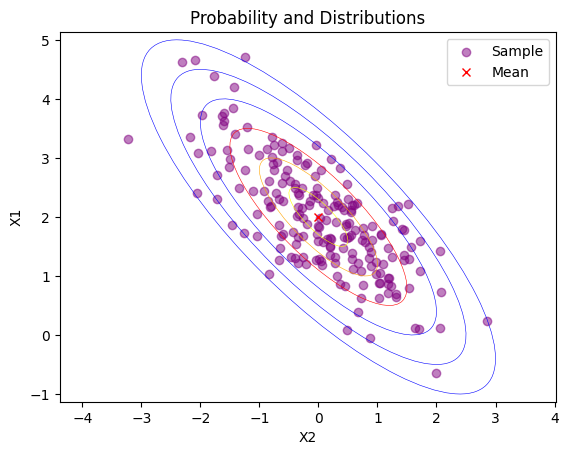

In [5]:
# Problem 1A & 1B
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from matplotlib.patches import Ellipse

# Mean & Covariance
mean = [0, 2]
cov = [[1, -0.8],
       [-0.8, 1]]


# Ellipse function
def add_ellipse(mean, cov, ax, n_std=1.0, **kwargs):

    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    width, height = 2 * n_std * np.sqrt(vals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=theta, **kwargs)

    ax.add_patch(ellipse)
    return ellipse

# Generate random samples for visualization
num_samples = 200
samples = multivariate_normal(mean, cov).rvs(size=num_samples)

# Plotting
fig, ax = plt.subplots()
ax.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color="purple", label="Sample" )

ax.plot(mean[0], mean[1], 'rx', label='Mean')
ax.legend()

# Add ellipses (1 standard deviation and 2 standard deviations)
add_ellipse(mean, cov, ax, n_std=0.5, edgecolor='yellow', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=1, edgecolor='orange', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=1.5, edgecolor='red', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=2, edgecolor='blue', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=2.5, edgecolor='blue', facecolor='none', linewidth=0.4)
add_ellipse(mean, cov, ax, n_std=3, edgecolor='blue', facecolor='none', linewidth=0.4)

# Set the title and labels
ax.set_title('Probability and Distributions')
ax.set_xlabel('X2')
ax.set_ylabel('X1')

# Set the x1 axis range from -2 to 2
ax.set_xlim(-2, 2)

# Equal Ratio so all plots are in the chart
ax.axis('equal')

# Display the plot
plt.show()


## Problem 2: Projection (20 points)

You may want to review these [linear algebra](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab) videos or the [other linear algebra links](https://pantelis.github.io/artificial-intelligence/aiml-common/lectures/ml-math/linear-algebra/index.html) provided in your course site.

Simulate a 3-dimensional (3d) Gaussian random vector with the following covariance matrix.

$$
\begin{bmatrix}
4 & 2 & 1 \\
2 & 3 & 1.5 \\
1 & 1.5 & 2 \\
\end{bmatrix}
$$

Using the Singular Value Decomposition (SVD) compute the projection of the simulated vector onto the subspace spanned by the first two principal components.

### Problem 2A (5 points)

What determines the principal components ?

### Problem 2B (5 points)

What determines the positive or negative correlations between the components ?

### Problem 2C (10 points)

Plot the projected vector and show whether or not the projection agrees with the positive or negative correlations of the original matrix.



In [1]:
import numpy as np

# Define the covariance matrix
covariance_matrix = np.array([
    [4, 2, 1],
    [2, 3, 1.5],
    [1, 1.5, 2]
])

# Simulate a 3-dimensional Gaussian random vector with the given covariance matrix
mean = [0, 0, 0]  # Assuming a mean of zero
random_vector = np.random.multivariate_normal(mean, covariance_matrix)

# Compute the Singular Value Decomposition (SVD) of the covariance matrix
U, S, Vt = np.linalg.svd(covariance_matrix)

# The first two principal components are given by the first two columns of U
first_two_components = U[:, :2]

# Project the simulated random vector onto the subspace spanned by the first two principal components
projection = first_two_components.dot(first_two_components.T.dot(random_vector))

random_vector, projection


(array([ 0.50449808, -0.22495562, -1.23785096]),
 array([ 0.63206601, -0.64010167, -0.81050242]))

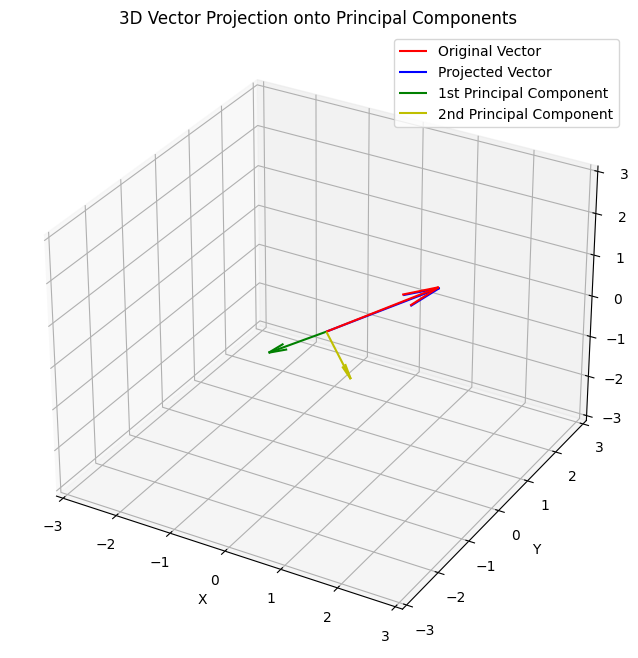

array([1.36111836, 1.21585944, 0.77483404])

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Given covariance matrix
cov_matrix = np.array([[4, 2, 1],
                       [2, 3, 1.5],
                       [1, 1.5, 2]])

# Mean vector is assumed to be zero for simplicity
mean_vector = np.zeros(3)

# Simulate a 3D Gaussian random vector
random_vector = np.random.multivariate_normal(mean_vector, cov_matrix)

# Perform SVD on the covariance matrix
U, S, Vt = np.linalg.svd(cov_matrix)

# Principal components are given by the columns of U
# Here we take the first two principal components
principal_components = U[:, :2]

# Project the random vector onto the subspace spanned by the first two principal components
projected_vector = principal_components @ principal_components.T @ random_vector

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Original vector
ax.quiver(0, 0, 0, random_vector[0], random_vector[1], random_vector[2], color='r', label='Original Vector')

# Projected vector
ax.quiver(0, 0, 0, projected_vector[0], projected_vector[1], projected_vector[2], color='b', label='Projected Vector')

# Plot the principal components
ax.quiver(0, 0, 0, U[0, 0], U[1, 0], U[2, 0], color='g', label='1st Principal Component')
ax.quiver(0, 0, 0, U[0, 1], U[1, 1], U[2, 1], color='y', label='2nd Principal Component')

# Plot properties
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Vector Projection onto Principal Components')
ax.legend()

# Show plot
plt.show()

# Answers to the questions
# Problem 2A: Principal components are determined by the eigenvectors of the covariance matrix, which are the columns of U in the SVD.
# Problem 2B: The positive or negative correlations between the components are determined by the sign of the off-diagonal elements in the covariance matrix.
# Problem 2C: The projected vector should show how the original vector is represented in the space of the principal components.

# The projected vector is returned for reference
projected_vector


### Problem 3: Stochastic Gradient Descent (30 points)

In class we covered the baseline stochastic gradient descent.  Using the linear regression example from the class notes, develop from scratch the baseline SGD algorithm. :

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of the algorithm.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed

### Problem 4: SGD Enhancements (30 points)

In this exercise you will implement from scratch for the linear regression problem some enhancements that  can improve the convergence of the algorithm.

1. Momentum (15 points)
2. Adam (15 points)

Clearly state the hyperparameters you used and present the loss vs epoch plot that demonstrates the convergence of each algorithm and comparatively to the baseline SGD algorithm. You can include all plots in the same figure.

In [ ]:
# Insert your answer here and fee free to add markdown cells as needed